# Abstract and Overview of Significance of Topic
Bat speed is a measure of player performance that has become increasingly popular for player development over the past decade. It is typically measured as the speed that the sweet spot of the bat (about 6 inches from the end of the barrel) is traveling when contact is made with the baseball. Bat speed has become increasingly popular due to its high correlation with exit velocity and subsequently hitting metrics such as expected batting average (xBA) or expected weighted on base average (xWOBA). Metrics such as xBA and xWOBA are modern metrics that are used to effectively quantify a players ability to contribute offensively in a positive manner. This increasing popularity in bat speed has led to a related increase in training methodologies based around developing it. Coaches across all levels of play use bat speed as a KPI to validate and inform individualized coaching decisions. 

# Formal Introduction to Topic


For our final project, we are using data from the Open Biomechanics Project (OBP) driveline baseball research. Our data captures the biomechanical breakdown of a baseball player's swing by measuring forces produced by different body parts in three dimensions over exact instances in time, for example, at instance X, player 103’s 2nd swing has a max lead hip force in the y direction of 111.73. The data was captured using a combination of ground force plates, a marker motion capture system, bat speed sensors, and ball flight monitors. The available data is rather robust, accounting for every piece of information that could be responsible for a baseball swing.


For our project, our goal is to create a machine learning model that uses this OBP data to identify the most important features of a player's swing when generating bat speed, and then use those features to accurately predict a player's bat speed. By comparing an athlete's true bat speed to their predicted bat speed based on our model, the player could identify how efficiently they are swinging. We hope that this model could be used by baseball players and coaches to address the unique aspects of a player's swing that could contribute to a higher bat speed, which in turn, would the players reach their fullest potential based on where their inefficiencies lie.
Our project can be broken down into two main processes: 
Identifying the key features that contribute to bat speed.
Creating a model that uses the key features to predict bat speed. 
For the first step, we have decided to run a Recursive Feature Elimination(RFE) on the 60 potential features from our dataset to pull out a smaller number of strong predictive features to use in our model. 
Next, using those select features, we will run a regression analysis to create a model that can be used to predict a player’s bat speed. 
Let’s take a closer look at these analyses. 

# Values Statement
 - see assignment post for what to include here
 
# Materials and Methods:

# Data
From the OBP dataset, we will be focusing on baseball-hitting data, specifically force plate and joint velocity to predict bat speed. The original datasets can be found at this link: https://github.com/drivelineresearch/openbiomechanics. Driveline baseball research collected this data using a combination of ground force plates, a marker motion capture system, bat speed sensors, and ball flight monitors. Originally, both the force plate and joint velocity datasets had over 1,000,000 observations, with each individual swing including thousands of observations because the swing was broken down by milliseconds. We felt it was unnecessary to keep the time aspect of the dataset, as the velocities produced for each feature variable were very similar from millisecond to millisecond, and the large datasets were difficult to work with. To get rid of the time component and obtain a more reasonably sized data set, we found the minimum, maximum and range of each feature variable in the dataset for every swing. Each swing is labeled by session_swing in our dataset, and each row is a different swing. The session swing is labeled by player ID and swing number, for example, session_swing 111_3 is player 111's third swing. Not all players have the same number of swings in the dataset, but we don't think this should have any impact on our results. After eliminating the time aspect, each swing has 60 potential feature variables. The 60 feature variables include the min, max and range of the forces produced by many different body parts in the x, y and z directions during a player's swing. Some examples include lead shoulder which is the player's shoulder closest to the pitcher, and rear hip which is the player's hip furthest from the pitcher. 

Our data possesses some limitations as it exclusively represents male baseball players and doesn't include any data from female softball players. We think it would be interesting for Driveline baseball research to expand to softball to eliminate some of the gender bias they have inadvertently caused. 


# Recursive Feature Elimination

Recursive Feature Elimination, or RFE is a recursive algorithm that is used to find the most impactful features out of a large feature set. This is accomplished by training machine learning on all the features, and then removing the least impactful features. This process is repeated with the smaller feature set, until the feature set is of the desired size. This can help prevent overfitting and allow for easier use and training. This does require that the model it is being used to select features has a way to calculate the effect of features, which means that it won’t work for every model, or some determinator has to be created for it to be used. Another drawback is that unless proper testing is done to find out the amount of impactful features, the accuracy can be diminished beyond the benefits of avoiding overfitting.

# Multiple Linear Regression

Because our project is concerned with predicting bat speed, we require a numeric prediction model, rather than a classification prediction model. We decided to use Multiple Linear Regression, which allows us to take two or more features in a dataset to predict a single numeric dependent variable, bat speed. Multiple Linear Regression differs from regular Linear Regression in that you can use more than one feature to predict the target variable. Once built, we can isolate each individual feature and evaluate its impact on the target variable.

With our linear regression model, we will be using the Mean Squared Error (MSE) loss function to determine the accuracy and performance of our model. 

# Random Forest Regression

Random Forest Regression is a technique that creates multiple decision trees and averages their outputs to give a final result that often has a high prediction/classification rate. The process involves the user selecting the amount, n, of decision trees to be created, then using the bootstrapping method to randomly select k data samples from the training set. (Bootstrapping is simply the process of randomly selecting subsets from a dataset over a certain number of iterations and a certain number of variables, then the results from each subset are averaged together which returns a more powerful result.) Then, create n decision trees using different random k values. Using the decision trees, predict regression results that can be used on unseen data. Finally, the regression results are all averaged together, returning a final regression output. Random Forests generally provide high accuracy for feature selection as it generates uncorrelated decision trees built by choosing a random set of features for each tree. 


# Variable Overview
The features which we have created our data set with fall into two main categories: biomechanics data and force plate data. Beginning with the biomechanics data, we have a set of joints and their associated angular velocities in three planes of motion. We have information on lead hip, lead shoulder, rear hip, rear shoulder, pelvis, torso, and the torso-pelvis complex. For each of these joints, we calculated the range of velocities and maximum velocities for each swing captured. With the force plate data, the lead foot and rear foot are independently observed, and the data is split among the three planes of motion along the x, y, and z axes. For each pairing of foot and plane of motion, we calculated the minimum, maximum, and range of the force produced.

# The Process

### Step 1: Cleaning the Data

Our original dataset contained over 1,000,000 observations that were grouped by session_swing. Each swing contained hundreds of observations that analyzed a variety of features over time (~0.0028 seconds between captures). For our project, we wanted to remove this time aspect and instead create a simplified dataset that contained the minimum, maximum, and range values of the features of interest for each swing. 

To do so, we imported our dataset in R and grouped it by the session_swing variable, and, by using base R functions, calculated the minimum, maximum, and range of each feature variable of interest. We repeated this for the force plate dataset and joint velocity dataset, then used left-join to combine the two datasets to create a conglomerate dataset with all potential predictive features for each session_swing variable. 

We then added our target vector, max bat speed, from POI_metrics.csv to create our fill dataset that includes our target vector. 

This process allowed us to get reduce the size of our dataset from over 1,000,000 observations to 665 session_swings.

### Step 2: RFE Feature Selection  

We used SKLearn’s RFE feature collection class, which can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html). 

The RFE model from the SKLearn class allowed us to gain the base understanding we needed to implement our own version of RFE. After reading through the API and playing around with the RFE feature from SKLearn, we decided to implement our own version of RFE to use with the linear regression model we also implemented. Our RFE function tkaes in three parameters: a feature matrix, X, a target vetor, y, and the number of features we want to be selected, k. The function uses a nested for loop to run through all values i in 1:k and at each iteration, j, checks the weight of all the remaining features that were fit on the linear regression model. From here, the best features are selected as the features with the minimum absolutle value of weight. We use this function in conjunction with our linear regression model to find the number of feautres within our dataset that most accuratley predict the batspeed of a player.



### Step 3: Building the Models — Multiple Linear Regression and Random Forest

We decided to implement our own linear regression model similar to our implementaiton from our original blog post in clss. In class, we implemented both an analytic and gradient descent version of linear regression, but for the model for our final project we just chose to implement the analytic version of linear regression. We used the same score, predict and pad functions from our blog post implementation. The fit function is very similar to the fit_analytic implementation from the blog post with a slight variation. Our model was poorly predicting bat spped which could have been for various reasons. To allow our model to better predict bat speed, we added a regualarization term to the weight vector in our fit model to help avoid over or underfitting of the model. We regularized everything but the bias term to avoid underfitting. Aside from this change, our model is very similar to the fit_analytic blog post implementation, and our model is ready to be used with the RFE function we implemented and discussed above. 

### Step 4: Testing the Models: Linear Regression and Random Forest

To test and train the models, we used an 80/20 train/test split. For both models, we ran a for loop which allowed us to see the training and testing scores produced when the recursive feature elimination selected 1-60 features. From here, we looked at our graphs which will be displayed below to helpe us decide what the optimal number of features to use was for each model. After choosing the optimal number of features to use on both models, we subseted our data to include just the selected features. From there, we created subets of the testing and training data to include only the selected features. Finally, we trained and tested our models on the subsetted train and testing data sets that were again split 80/20. 



# Results and Conclusion

Below is the graph produced from the for loop when running RFE with our linear regression model starting with selecting 1 feature all the way through selecting 60 features. As we can see from the graph, our training and testing accuracy scores follow a similar path. Our testing accuracy performs better than the training when the model is ran 

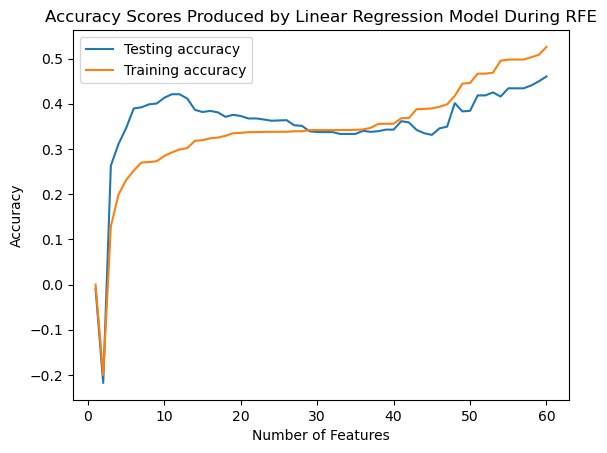

In [6]:
from LinearRegressionAnalytic import LinearRegressionAnalytic
from LinearRegressionAnalytic import rfe
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
data = pd.read_csv("biomechanics_dataset_v1.csv") 

np.random.seed(1)
X = data.iloc[:,1:60]
y = data.iloc[:, 60]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .2)


val_scores = []
train_scores = []
for k in range(60):
    selected_features = rfe(x_train, y_train, k)
    feature_mask = np.zeros(x_train.shape[1], dtype=bool)
    #masking to include only the selected features
    feature_mask[selected_features] = True
    #subseting x train and test to include only selected feautres
    X_train_selected = x_train.loc[:, feature_mask]
    X_test_selected = x_test.loc[:, feature_mask]
    lr = LinearRegressionAnalytic()
    #fitting model on selected features
    lr.fit(X_train_selected, y_train)
    #appending score to score list
    val_scores.append(lr.score(X_test_selected, y_test))
    train_scores.append(lr.score(X_train_selected, y_train))

# plot the results
import matplotlib.pyplot as plt
plt.plot(range(1, 61), val_scores, label='Testing accuracy')
plt.plot(range(1, 61), train_scores, label='Training accuracy')
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Scores Produced by Linear Regression Model During RFE")
plt.show()

# Bias
- Who benefits, who doesn't
- gender discrimination, accesibility
- pull from Project Proposal

# Application
- How could this be used by other teams/sports/groups 




# TO DO:
- Outstanding: David to write a quick paragraph on “Overview of Significance of Topic”
    - Julia will edit and bulk up with outside data
- Outstanding: David and Cece work on completing “Variable Overview” on Thursday
    - Julia to pull in images that explain different variables 
        - Ex. hip rotation visual 
- NEW: Cece + Julia to create GSlides for presentation
- NEW: Sam to refine RFE